INFO:util.fancy_data_loader:Loading data from data/week_1/PrivacyhubDB.contactsensorstates.json
INFO:util.fancy_data_loader:Loading data from data/week_1/PrivacyhubDB.onoffpluginunitstates.json
INFO:util.fancy_data_loader:Loading data from data/week_2/PrivacyhubDB.contactsensorstates.json
INFO:util.fancy_data_loader:Loading data from data/week_2/PrivacyhubDB.onoffpluginunitstates.json
INFO:util.fancy_data_loader:Loading data from data/week_3/PrivacyhubDB.contactsensorstates.json
INFO:util.fancy_data_loader:Loading data from data/week_3/PrivacyhubDB.onoffpluginunitstates.json
INFO:util.fancy_data_loader:Loading data from data/week_4/PrivacyhubDB.contactsensorstates.json
INFO:util.fancy_data_loader:Loading data from data/week_4/PrivacyhubDB.onoffpluginunitstates.json
INFO:util.fancy_data_loader:Filtered data of 13E56C4E1FD98745 based on actual privacy state: before=838, after=66
INFO:util.fancy_data_loader:Filtered data of 39C0AE0A9852E5EE based on actual privacy state: before=363, after

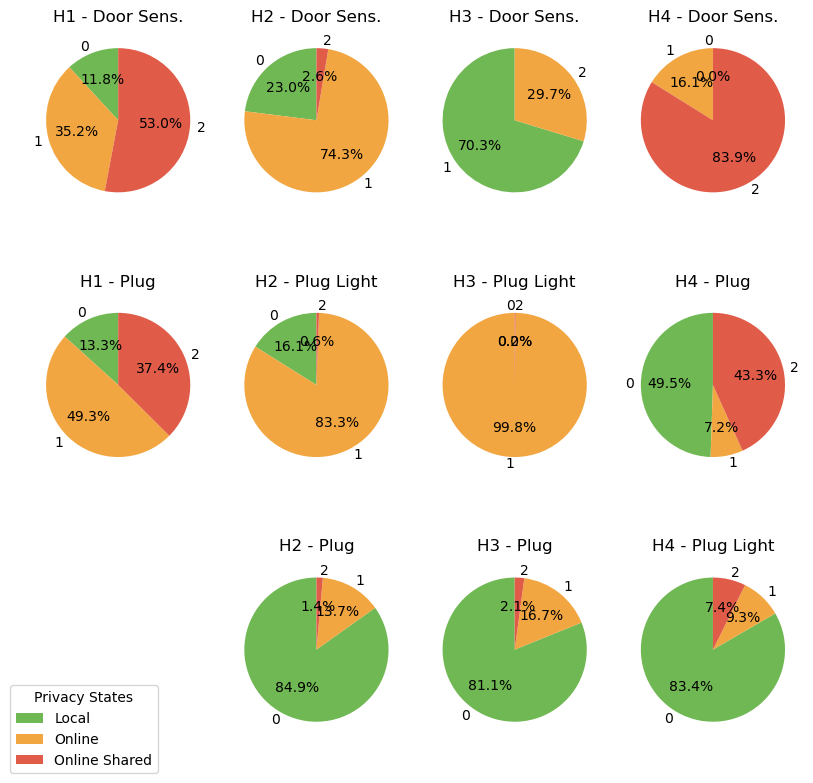

In [51]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import util.fancy_data_loader as data_loader

# color_mapping = {
#     data_loader.PrivacyState["LOCAL"]: 'green',
#     data_loader.PrivacyState["ONLINE"]: 'blue',
#     data_loader.PrivacyState["ONLINE_SHARED"]: 'red',
# }

colors = ["#70b853", "#f2a641", "#e05c49"]
        

TITLE_CONTACT_SENSOR = 'Door Sens.'
TITLE_PLUG = 'Plug'
TITLE_PLUG_LIGHT = 'Plug Light'

unique_id_mapping = {
    '13E56C4E1FD98745': TITLE_CONTACT_SENSOR,
    '39C0AE0A9852E5EE': TITLE_PLUG,
    'F7D9D208C65ADE9B': TITLE_CONTACT_SENSOR,
    'B1844314D756D84B': TITLE_PLUG_LIGHT,
    'BEC8B63351AC02EC': TITLE_PLUG,
    '29E2D375B84AE67A': TITLE_CONTACT_SENSOR,
    '04D7DC521AF6EC84': TITLE_PLUG_LIGHT,
    '6E628ADD7E9FB178': TITLE_PLUG,
}

# Sample data for the pie charts
data = data_loader.fancy_load_data_change_types([1, 2, 3, 4])

# Calculate the total time spent in each privacy state in each week for each device
data_privacy_state_counts = {}
for week, week_data in data.items():
    data_privacy_state_counts[week] = {}
    for unique_id, unique_id_data in week_data.items():
        # print(unique_id_data)
        data_privacy_state_counts[week][unique_id] = {}
        for key, value in enumerate(unique_id_data):
            if key == 0:
                continue
                
            # Check if data_privacy_state_counts[week][unique_id][value["privacyState"]] exists
            if value["privacyState"] not in data_privacy_state_counts[week][unique_id]:
                data_privacy_state_counts[week][unique_id][value["privacyState"]] = 0
            # Calculate the time spent in this privacy state
            # print(value["timestamp"]["$numberLong"])
            data_privacy_state_counts[week][unique_id][value["privacyState"]] += int(value["timestamp"]["$numberLong"]) - int(unique_id_data[key - 1]["timestamp"]["$numberLong"])
        # Sort the privacy states chronologically
        data_privacy_state_counts[week][unique_id] = dict(sorted(data_privacy_state_counts[week][unique_id].items(), key=lambda x: x[0]))
    
# print(json.dumps(data_privacy_state_counts, indent=2))

# Sample data for the pie charts
# mock_data = [
#     [30, 10, 20, 40], [15, 35, 25, 25], [10, 20, 30, 40],
#     [25, 25, 25, 25], [35, 25, 20, 20], [20, 30, 25, 25],
#     [25, 20, 30, 25], [40, 20, 20, 20], [30, 30, 20, 20],
#     [20, 20, 30, 30], [25, 25, 25, 25], [20, 30, 25, 25]
# ]

# print(data)

# Labels for the pie charts
labels = ['Local', 'Online', 'Online Shared']

# Creating subplots with custom spacing
fig, axs = plt.subplots(3, 4, figsize=(10, 10), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})

for week, week_data in data.items():
    data_index = 0
    # print(week_data.keys())
    for unique_id, unique_id_data in week_data.items():
        week_index = week - 1
        title = unique_id_mapping.get(unique_id, 'Unknown')
        # colors = [color_mapping.get(state, 'black') for state in labels]
        # axs[week, data_index].pie(mock_data[week * 3 + data_index], labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
        # axs[data_index, week_index].pie(mock_data[week_index * 3 + data_index], labels=labels, autopct='%1.1f%%', startangle=90)
        # axs[data_index, week_index].pie(mock_data[week_index * 3 + data_index], autopct='%1.1f%%', startangle=90)
        # print(data_privacy_state_counts[week][unique_id])
        axs[data_index, week_index].pie(data_privacy_state_counts[week][unique_id].values(), labels=data_privacy_state_counts[week][unique_id].keys(), autopct='%1.1f%%', startangle=90, colors=colors)
        # axs[week_index, data_index].pie(mock_data[week_index * 3 + data_index], labels=labels, autopct='%1.1f%%', startangle=90)
        axs[data_index, week_index].set_title(f'H{week} - {title}')
        # axs[week_index, data_index].set_title(f'{title} - Week {week}')
        data_index += 1
        
axs[2, 0].axis('off')

# Add legend at the bottom left
fig.legend(labels, loc='lower left', title='Privacy States', bbox_to_anchor=(0.1, 0.1))

# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
# # Plotting the pie charts
# for i in range(4):
#     for j in range(3):
#         if i == 0 and j > 1:  # First group has only 2 pie charts
#             axs[i, j].axis('off')
#         else:
#             # idx = i * 3 + j if i == 0 else i * 3 + j - 1  # Adjust index for 2 in the first row
#             # idx = (i * 3 + i) if i > 0 else i
#             idx = i * 3 + j
#             axs[i, j].pie(data[idx], labels=labels, autopct='%1.1f%%', startangle=90)
#             axs[i, j].set_title(f'Pie Chart {idx + 1}')

# Adjust layout to prevent overlap
# plt.tight_layout(rect=[0, 0, 1, 0.95])

# # Display the pie charts
# plt.show()
# 
# # Convert to DataFrame
# df = pd.json_normalize(data)
# df['timestamp'] = pd.to_numeric(df['timestamp.$numberLong'])
# 
# # Sort by uniqueId and timestamp
# df = df.sort_values(by=['uniqueId', 'timestamp'])
# 
# # Calculate the duration for each state
# df['next_timestamp'] = df.groupby('uniqueId')['timestamp'].shift(-1)
# df['duration'] = df['next_timestamp'] - df['timestamp']
# 
# # Handle the last state duration as 0 (or you may assign it a large value if it represents ongoing state)
# df['duration'].fillna(0, inplace=True)
# 
# # Aggregate the total time spent in each privacyState for each device
# duration_df = df.groupby(['uniqueId', 'privacyState'])['duration'].sum().unstack(fill_value=0)
# 
# # Plotting
# duration_df.plot(kind='bar', stacked=True)
# plt.xlabel('Device ID')
# plt.ylabel('Duration in Each Privacy State')
# plt.title('Time Spent in Each Privacy State by Device')
# plt.legend(title='Privacy State')
# plt.show()